In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets/quora_question_pairs/train.csv")
df.shape

(404290, 6)

In [4]:
df = df.sample(50000)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
349414,349414,188244,82603,Is Pocketshopy.com a scam?,Is AdultFriendFinder.com a scam?,0
197328,197328,298258,267085,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...,0
128835,128835,207096,207097,What is this place?,What the hell is wrong with Trump? Why doesn't...,0
113174,113174,185024,185025,What is management by objectives?,What are the benefits of management by objecti...,0
155879,155879,161049,87804,How many months does it require to prepare for...,How many months does it take to prepare for th...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 349414 to 42846
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     49999 non-null  object
 4   question2     49999 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [6]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       1
is_duplicate    0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
# duplicate rows
df.duplicated().sum()

0

In [12]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())


is_duplicate
0    31531
1    18467
Name: count, dtype: int64


In [13]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

is_duplicate
0    63.064523
1    36.935477
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

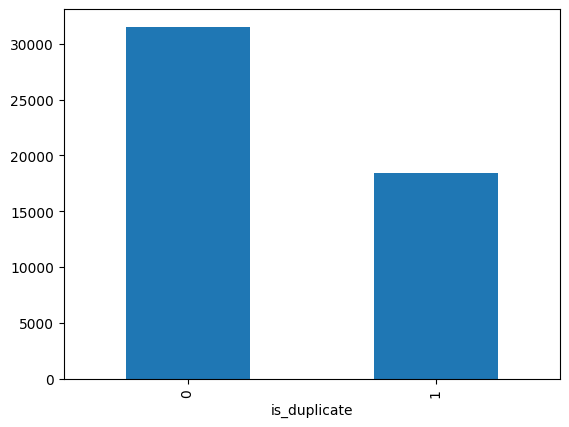

In [14]:

df['is_duplicate'].value_counts().plot(kind='bar')

In [16]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 88880
Number of questions getting repeated 7450


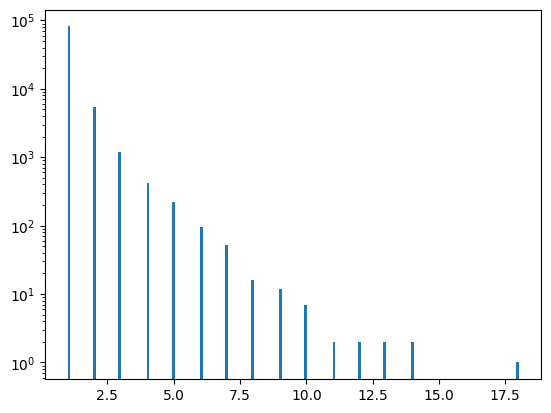

In [17]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()